# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

In [61]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = ['ut', '\'re','.', ',', '--', '\'s','cf', '?', ')', '(', ':','\'','\"', '-', '}','â','£', '{', '&', '|', u'\u2014', '', ']' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf.pop(k, None)
    
    common_word = ['the', 'and', 'of', 'to', 'was', 'a', 'in', 'had', 'that', 'it', 'they', 
                   'he', 'where' ,'his', 'were', "it", "the", "in", "a", "for", "as", "is", "be", "to", "but", "on", "are", 
                   "from", 'with', 'at', 'you', 'him', 'she', 'her', 'their', 'not', 'been', 'then', 'there', 'by', 'i', 'or', 'no', 
                   'have', 'or', 'which', 'what', 'when', 'where', 'all', 'we', 'them']
            
    for k in common_word:
        wf.pop(k, None)
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('https://gutenberg.net.au/ebooks01/0100011.txt')
(wf_bu, tw_bu) = get_wf('http://gutenberg.net.au/ebooks01/0100021.txt')

<BarContainer object of 15 artists>

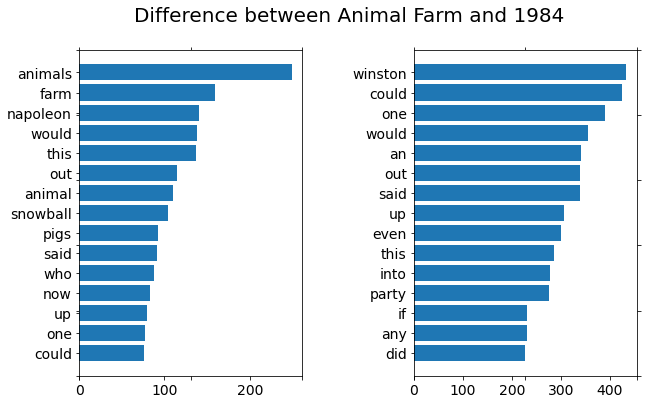

In [62]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
title = 'Difference between Animal Farm and 1984'
f = plt.figure (figsize=(10, 6))

# this is painfully tedious....
f .suptitle (title, fontsize=20)
ax = f.add_subplot(111)
ax.spines ['top'] .set_color ('none')
ax.spines ['bottom'] .set_color ('none')
ax.spines ['left'] .set_color ('none')
ax.spines ['right'] .set_color ('none')
ax.tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

# Create two subplots, this is the first one
ax1 = f.add_subplot(121)
plt.subplots_adjust(wspace=.5)

pos = np.arange(len(wf_ee)) 
ax1.tick_params (axis='both', which='major', labelsize=14)
pylab.yticks (pos, [x[0] for x in wf_ee ])
ax1.barh (range(len(wf_ee)), [x[1] for x in wf_ee], align='center')
ax2 = f .add_subplot (122)
ax2 .tick_params (axis='both', which='major', labelsize=14)
pos = np .arange (len(wf_bu)) 
pylab .yticks (pos, [ x[0] for x in wf_bu ])
ax2.barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

 


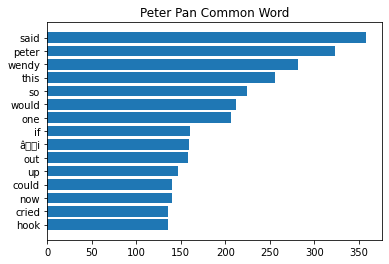

In [63]:
(wf_pp, tw_pp) = get_wf('https://www.gutenberg.org/files/16/16-0.txt')

plt.title("Peter Pan Common Word")
plt.barh(range(len(wf_pp)), [x[1] for x in wf_pp], align = 'center')
plt.yticks(np.arange(len(wf_pp)), [x[0] for x in wf_pp])
plt.show()

What is the question?
   - The question im asking is to see if there is common words that are used to describe a dystopian world and if they differ from            other fantasy stories. 
   
What was the approach?
    - Get the website link, get each word from txt file and removing any common words.
    
What problems did I encounter?
    - A lot of common words are there and it was difficult to get rid of them completely 
    
What results did I get?
    - Looking at the bar graph above, George Owell liked to use 'could' a lot more in the book 1984 then he did for animal farm. In Peter Pan, we could assume that it has way more dialogue than the other two George Owell book because of the word "said". Due to this reason, we can also see names appearing more often then the other two books. 
    
What new ideas did this generate?
    - Now I want to try to compare non-fictional and fictional book and see if authors prefer different words to explain their ideas or facts